<a href="https://colab.research.google.com/github/fulasho/Data-Analytics-201/blob/main/Data201_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Let upload the csv(NYPD Arrest Data) file that was downloaded from the NYC Open Data

In [3]:
df = pd.read_csv('/content/sample_data/NYPD_Arrest_Data__Year_to_Date_.csv')

In [4]:
# let pull the head of the file by using the .head function
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                115299 non-null  int64  
 1   ARREST_DATE               115299 non-null  object 
 2   PD_CD                     115278 non-null  float64
 3   PD_DESC                   115238 non-null  object 
 4   KY_CD                     115238 non-null  float64
 5   OFNS_DESC                 115238 non-null  object 
 6   LAW_CODE                  115299 non-null  object 
 7   LAW_CAT_CD                114221 non-null  object 
 8   ARREST_BORO               115299 non-null  object 
 9   ARREST_PRECINCT           115299 non-null  int64  
 10  JURISDICTION_CODE         115299 non-null  int64  
 11  AGE_GROUP                 115299 non-null  object 
 12  PERP_SEX                  115299 non-null  object 
 13  PERP_RACE                 115299 non-null  o

In [6]:
# Let verify if this dataset has any duplicated row
df.duplicated().sum()

0

In [7]:
# Now that we have all the information about this dataset let do some data cleaning and tidying before we do our analysis.

In [8]:
# In order to do our analysis let drop some unnecessary columns
drop_cols = ['PD_CD','PD_DESC','KY_CD','LAW_CODE','X_COORD_CD','Y_COORD_CD','New Georeferenced Column','JURISDICTION_CODE']
df.drop(drop_cols, inplace = True, axis=1)

In [9]:
# Let see the columns
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO',
       'ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude',
       'Longitude'],
      dtype='object')

In [10]:
df.head()

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,234233843,09/29/2021,FELONY ASSAULT,F,B,42,25-44,M,BLACK,40.826189,-73.909738
1,234129823,09/27/2021,RAPE,F,K,77,25-44,M,BLACK,40.674583,-73.930222
2,234040747,09/25/2021,FELONY ASSAULT,F,Q,101,25-44,M,BLACK,40.603441,-73.765986
3,234047720,09/25/2021,ASSAULT 3 & RELATED OFFENSES,M,B,44,25-44,M,BLACK,40.837782,-73.919458
4,234042526,09/25/2021,ASSAULT 3 & RELATED OFFENSES,M,B,44,25-44,M,BLACK,40.835990,-73.916276


In [11]:
# Let pull out all the types offenses that are in this dataset

In [12]:
(df['OFNS_DESC'])

0                       FELONY ASSAULT
1                                 RAPE
2                       FELONY ASSAULT
3         ASSAULT 3 & RELATED OFFENSES
4         ASSAULT 3 & RELATED OFFENSES
                      ...             
115294                  FELONY ASSAULT
115295                  FELONY ASSAULT
115296        VEHICLE AND TRAFFIC LAWS
115297                   PETIT LARCENY
115298               DANGEROUS WEAPONS
Name: OFNS_DESC, Length: 115299, dtype: object

In [13]:
# Let count all the arrest that happened in each borough

In [14]:
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
K    31004
M    28948
B    25312
Q    24654
S     5381
Name: ARREST_KEY, dtype: int64

In [15]:
# Then group it by age group

In [16]:
df.groupby(['ARREST_BORO', 'AGE_GROUP'])['ARREST_KEY'].count()

ARREST_BORO  AGE_GROUP
B            18-24         5138
             25-44        14496
             45-64         4456
             65+            291
             <18            931
K            18-24         6225
             25-44        17635
             45-64         5637
             65+            437
             <18           1070
M            18-24         4750
             25-44        16448
             45-64         6580
             65+            489
             <18            681
Q            18-24         4766
             25-44        14156
             45-64         4754
             65+            392
             <18            586
S            18-24         1052
             25-44         3111
             45-64         1011
             65+             67
             <18            140
Name: ARREST_KEY, dtype: int64

In [17]:
# In this part we going to pick a particular age group (under 18) try to answer these questions: what is the total number of arrest in each borough and what type of crime these individuals have committed

In [18]:
df_age_index = df.set_index('AGE_GROUP')

In [19]:
df_under_18 = df_age_index.loc["<18"]

In [20]:
df_under_18["ARREST_BORO"].value_counts()

K    1070
B     931
M     681
Q     586
S     140
Name: ARREST_BORO, dtype: int64

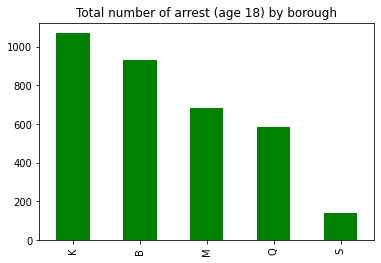

In [21]:
df_under_18["ARREST_BORO"].value_counts().plot(kind='bar',color=('green'), title='Total number of arrest (age 18) by borough')

In [22]:
# Let make the summation of all the arrest among under 18 age group for the five borough

In [23]:
df_under_18["ARREST_BORO"].value_counts().sum()

3408

In [24]:
# Let identify the types of crime that these individuals were arrested for

In [25]:
df_under_18_arrest_type = df_under_18["LAW_CAT_CD"].value_counts(normalize=True)

In [26]:
df_under_18["LAW_CAT_CD"].value_counts(sort=True)

F    2271
M    1135
I       2
Name: LAW_CAT_CD, dtype: int64

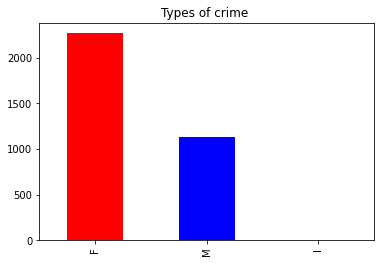

In [27]:
df_under_18["LAW_CAT_CD"].value_counts().plot(kind='bar',color=['red','blue','orange'], title='Types of crime ')

Conlusion, from our analysis we can see that 3408 arrest were made among under 18 age group in the five borough by the NYPD and Brooklyn had the highest arrest among them . Most of the crimes were classified as: Felony Assault and Misdemeaor. Felony Assault acounted for 2271 arrest and misdemeaor 1135.